# Homework 3

## Yuxuan Jiang yj26@illinois.edu

Firstly, import packages and csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/licenses_fall2022.csv"
licenses = pd.read_csv(url)

Then, try to read the licenses file to see how it looks like:

In [3]:
licenses

,_id,License Type,Description,License Number,License Status,Business,Title,First Name,Middle,Last Name,...,Specialty/Qualifier,Controlled Substance Schedule,Delegated Controlled Substance Schedule,Ever Disciplined,LastModifiedDate,Case Number,Action,Discipline Start Date,Discipline End Date,Discipline Reason
0,1189509,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129446286,NOT RENEWED,N,NaN,EILEEN,NaN,SANTACRUZ,...,None,None,None,N,03/18/2022,None,None,None,None,None
1,801037,DETECTIVE BOARD,FIREARM CONTROL CARD,229030294.0,NOT RENEWED,N,NaN,DAGMAR,J,NORDLUND,...,None,None,None,N,08/16/2006,None,None,None,None,None
2,365129,COSMO,LICENSED COSMETOLOGIST,11053076.0,NOT RENEWED,N,NaN,RADOJE,NaN,ZELENOVIC,...,None,None,None,N,05/26/2006,None,None,None,None,None
3,595427,COSMO,LICENSED COSMETOLOGIST,11295645.0,ACTIVE,N,NaN,BECKY SUE,L,BURROUGHS,...,None,None,None,N,11/12/2021,None,None,None,None,None
4,653668,COSMO,LICENSED NAIL TECHNICIAN,169006247,NOT RENEWED,N,NaN,BILL G,L,LETNER,...,None,None,None,N,05/30/2006,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,888281,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129002843.0,NOT RENEWED,N,NaN,JENNIFER,NaN,DARROW,...,None,None,None,N,08/03/2006,None,None,None,None,None
9996,766623,DETECTIVE BOARD,FIREARM CONTROL CARD,229014180,TERMINATED CARD RETURNED,N,NaN,BRYAN,NaN,WILLIAMS,...,None,None,None,N,08/07/2006,None,None,None,None,None
9997,399398,COSMO,LICENSED COSMETOLOGIST,11120249,NOT RENEWED,N,NaN,EUGENE,NaN,HENDERSON JR,...,None,None,None,N,05/26/2006,None,None,None,None,None
9998,486713,COSMO,LICENSED COSMETOLOGIST,11193270,ACTIVE,N,NaN,MAHLON DOUGLAS,NaN,CLIFT,...,None,None,None,N,12/17/2021,None,None,None,None,None


In [4]:
licenses.columns

Index(['_id', 'License Type', 'Description', 'License Number',
       'License Status', 'Business', 'Title', 'First Name', 'Middle',
       'Last Name', 'Prefix', 'Suffix', 'Business Name', 'BusinessDBA',
       'Original Issue Date', 'Effective Date', 'Expiration Date', 'City',
       'State', 'Zip', 'County', 'Specialty/Qualifier',
       'Controlled Substance Schedule',
       'Delegated Controlled Substance Schedule', 'Ever Disciplined',
       'LastModifiedDate', 'Case Number', 'Action', 'Discipline Start Date',
       'Discipline End Date', 'Discipline Reason'],
      dtype='object')

## 1. Relationship between the Original Issue Year and the Expiration Year

Firstly, print out the original issue year

In [5]:
licenses['Original Issue Date'] = pd.to_datetime(licenses['Original Issue Date'],errors='coerce', format='%m/%d/%Y')
licenses['Original Issue Year'] = licenses['Original Issue Date'].dt.year
licenses['Original Issue Year']

0       2020.0
1       1995.0
2       1945.0
3       2011.0
4       1995.0
         ...  
9995    1987.0
9996    1989.0
9997    1966.0
9998    1983.0
9999    2008.0
Name: Original Issue Year, Length: 10000, dtype: float64

Then, print out the expiration year data

In [6]:
licenses['Expiration Date'] = pd.to_datetime(licenses['Expiration Date'],errors='coerce', format='%m/%d/%Y')
licenses['Expiration Year'] = licenses['Expiration Date'].dt.year
licenses['Expiration Year']

0       2021.0
1       2003.0
2       1983.0
3       2023.0
4       2002.0
         ...  
9995    1997.0
9996    1990.0
9997       NaN
9998    2023.0
9999    2024.0
Name: Expiration Year, Length: 10000, dtype: float64

Lastly, plot out all the data from original issue year and expiration year data and set graph type into scatter plot. 

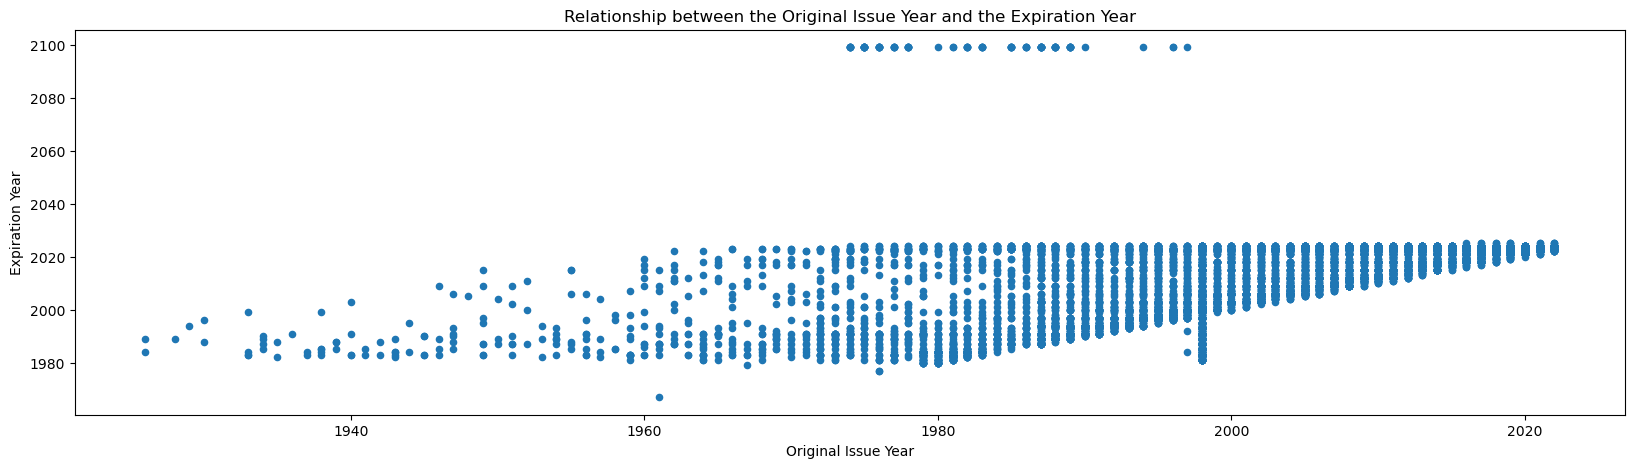

In [7]:
licenses.plot(x='Original Issue Year', y='Expiration Year', title='Relationship between the Original Issue Year and the Expiration Year',figsize=(20,5),kind='scatter')

As we can see in the graph, there are some outliers with expiration year of 2100. There are a lot of licenses issued between 1980 and 2000. Also, start from 2000, there are less and lees licenses issued and mostly will expired before 2040.  

## 2. Average Effective Year as a function of License Type

Firstly, print out all the effective date. 

In [8]:
licenses['Effective Date']

0       02/03/2020
1       02/07/1995
2       02/28/1945
3       11/12/2021
4       07/12/1995
           ...    
9995    08/04/1987
9996    05/22/1989
9997    05/09/1966
9998    12/17/2021
9999    10/25/2021
Name: Effective Date, Length: 10000, dtype: object

Then, format the date into month/date/year and print out all the effective year instead of date. 

In [9]:
licenses['Effective Date'] = pd.to_datetime(licenses['Effective Date'],errors='coerce', format='%m/%d/%Y')
licenses['Effective Year'] = licenses['Effective Date'].dt.year
licenses['Effective Year']

0       2020.0
1       1995.0
2       1945.0
3       2021.0
4       1995.0
         ...  
9995    1987.0
9996    1989.0
9997    1966.0
9998    2021.0
9999    2021.0
Name: Effective Year, Length: 10000, dtype: float64

After that, group the License Type using groupby. 

In [10]:
licenses_group = licenses.groupby('License Type')['Effective Year'].describe()
licenses_group

,count,mean,std,min,25%,50%,75%,max
License Type,,,,,,,,
APPRAISAL,5.0,2009.600000,3.974921,2004.0,2007.00,2011.0,2013.00,2013.0
ARCHITECT,18.0,2011.611111,16.403511,1950.0,2010.50,2017.0,2020.00,2021.0
ATHLETIC TRAINER,14.0,2015.357143,7.023117,2000.0,2011.25,2017.5,2021.50,2022.0
ATHLETICS,15.0,2000.933333,16.210520,1976.0,1984.00,2007.0,2016.00,2019.0
AUCTIONEER,2.0,2015.000000,7.071068,2010.0,2012.50,2015.0,2017.50,2020.0
CEMETERY OVERSIGHT,1.0,2016.000000,NaN,2016.0,2016.00,2016.0,2016.00,2016.0
CLIN PSYCHOLOGIST,11.0,2018.363636,4.717472,2008.0,2020.00,2020.0,2020.00,2022.0
COLLECTION AGENCY,19.0,2010.315789,12.087885,1980.0,2002.50,2012.0,2021.00,2022.0
COMM ASSOC MGR,37.0,2018.837838,3.068781,2011.0,2017.00,2021.0,2021.00,2022.0


Lastly, using plot graph to plot out the average effective year of each licenses type. 

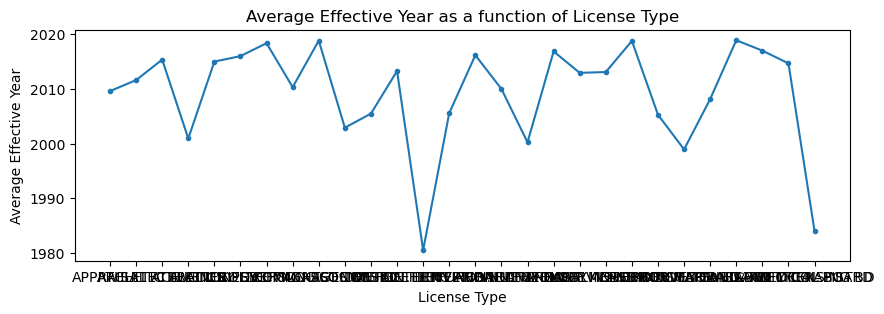

In [11]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(licenses_group['mean'],marker='.')
ax.set_xlabel('License Type')
ax.set_ylabel('Average Effective Year')
ax.set_title('Average Effective Year as a function of License Type')
plt.show()

As we can see in the picutre, since the x axis of this graph is license type and each type has its unique long name, the name overlap together. I tried to make ratio into 50 by 3, but it is too samll to read and hardly see the plot graph. So I just set into 10 by 3 to get a better idea of the graph but with the trade off of not being able seeing all the license type name. 

## 3. Median Effective Month in each Effective Issue Year as a function of median Original Issue Year


Firstly, use the effective date data I used above and read the effective month data. 

In [12]:
licenses['Effective Month'] = licenses['Effective Date'].dt.month
licenses['Effective Month']

0        2.0
1        2.0
2        2.0
3       11.0
4        7.0
        ... 
9995     8.0
9996     5.0
9997     5.0
9998    12.0
9999    10.0
Name: Effective Month, Length: 10000, dtype: float64

Then, groupby the effective year and effective month with its median number

In [13]:
effective_month = licenses.groupby('Effective Year')['Effective Month'].median()
effective_month

Effective Year
1912.0    7.0
1918.0    9.0
1919.0    8.5
1923.0    8.0
1926.0    1.0
         ... 
2018.0    6.0
2019.0    8.0
2020.0    9.0
2021.0    9.0
2022.0    2.0
Name: Effective Month, Length: 100, dtype: float64

After that, groupby the data of effective year and origianl issue year with its median number

In [14]:
original_issue_year = licenses.groupby('Effective Year')['Original Issue Year'].median()
original_issue_year

Effective Year
1912.0    1912.0
1918.0    1918.0
1919.0    1919.0
1923.0    1923.0
1926.0    1926.0
           ...  
2018.0    2015.0
2019.0    2017.0
2020.0    2013.0
2021.0    2011.0
2022.0    2015.0
Name: Original Issue Year, Length: 100, dtype: float64

Set effective_month as df1 and original_issue_year as df2 and combine those two tables into df3

In [15]:
df1 = effective_month
df2 = original_issue_year

In [16]:
#df1

In [17]:
#df2

In [18]:
df3 = pd.concat([df1, df2], axis=1)
df3

,Effective Month,Original Issue Year
Effective Year,,
1912.0,7.0,1912.0
1918.0,9.0,1918.0
1919.0,8.5,1919.0
1923.0,8.0,1923.0
1926.0,1.0,1926.0
...,...,...
2018.0,6.0,2015.0
2019.0,8.0,2017.0
2020.0,9.0,2013.0


Plot out the df3 with x axis of median original issue year and y axis of median effective month 

Text(0.5, 1.0, 'Median Effective Month in each Effective Issue Year as a function of median Original Issue Year')

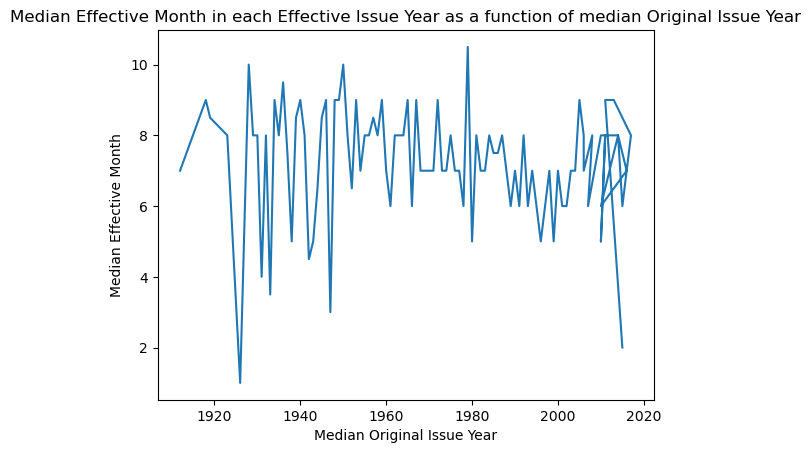

In [19]:
plt.plot(df3['Original Issue Year'], df3['Effective Month'])
plt.xlabel('Median Original Issue Year')
plt.ylabel('Median Effective Month')
plt.title('Median Effective Month in each Effective Issue Year as a function of median Original Issue Year')

Finally, got the plot graph of the relationship of median effective month in each effective issue years as a function of median original issue year. As we can see in the graph, hte median effective months in each original issue year is quite different and I can barely see any relationship between those. 

For this whole assignemnt 3, everything work fine with no problem. But there are still something I could improve in the next time. Changing the proportion of each graph to make it much easier to read. Especailly in Question 2, the labels on x-axis is overlayed very bad and I am still thinking a better way represent it. 